In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
import pandas as pd

# Define dataset and metadata file paths
data_file_path = "/content/drive/MyDrive/Breast Cancr/dataset/wdbc.data"
names_file_path = "/content/drive/MyDrive/Breast Cancr/dataset/wdbc.names"

# Read and display dataset metadata (if available)
try:
    with open(names_file_path, "r") as file:
        print("Dataset Metadata:\n")
        print(file.read())
except FileNotFoundError:
    print("Metadata file (wdbc.names) not found.")

# Define column names (from dataset documentation)
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]

# Load dataset
df = pd.read_csv(data_file_path, header=None, names=columns)

# Drop ID column (not useful for ML models)
df.drop(columns=['ID'], inplace=True)

# Convert Diagnosis ('M' = Malignant, 'B' = Benign) to numeric values (1 = Malignant, 0 = Benign)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Display first few rows
print("\nFirst 5 rows of the dataset:\n")
print(df.head())

# Show dataset summary
print("\nDataset Summary:\n")
print(df.info())

# Display basic statistics
print("\nDataset Statistics:\n")
print(df.describe())


Dataset Metadata:

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations R

In [5]:
# Step 3: Display dataset information
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19  569 non-null    f

In [6]:
# Step 4: Check for missing values
print(df.isnull().sum())


Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


<ipython-input-7-627b783eb3d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Diagnosis'], palette='coolwarm')


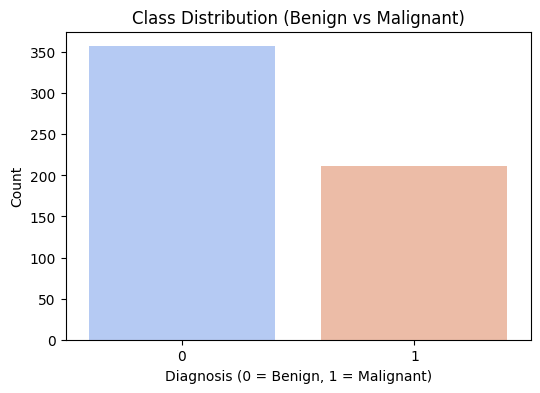

In [7]:
# Step 5: Visualize the distribution of classes (Benign vs Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diagnosis'], palette='coolwarm')
plt.title('Class Distribution (Benign vs Malignant)')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()
